In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

### The benchmark functions

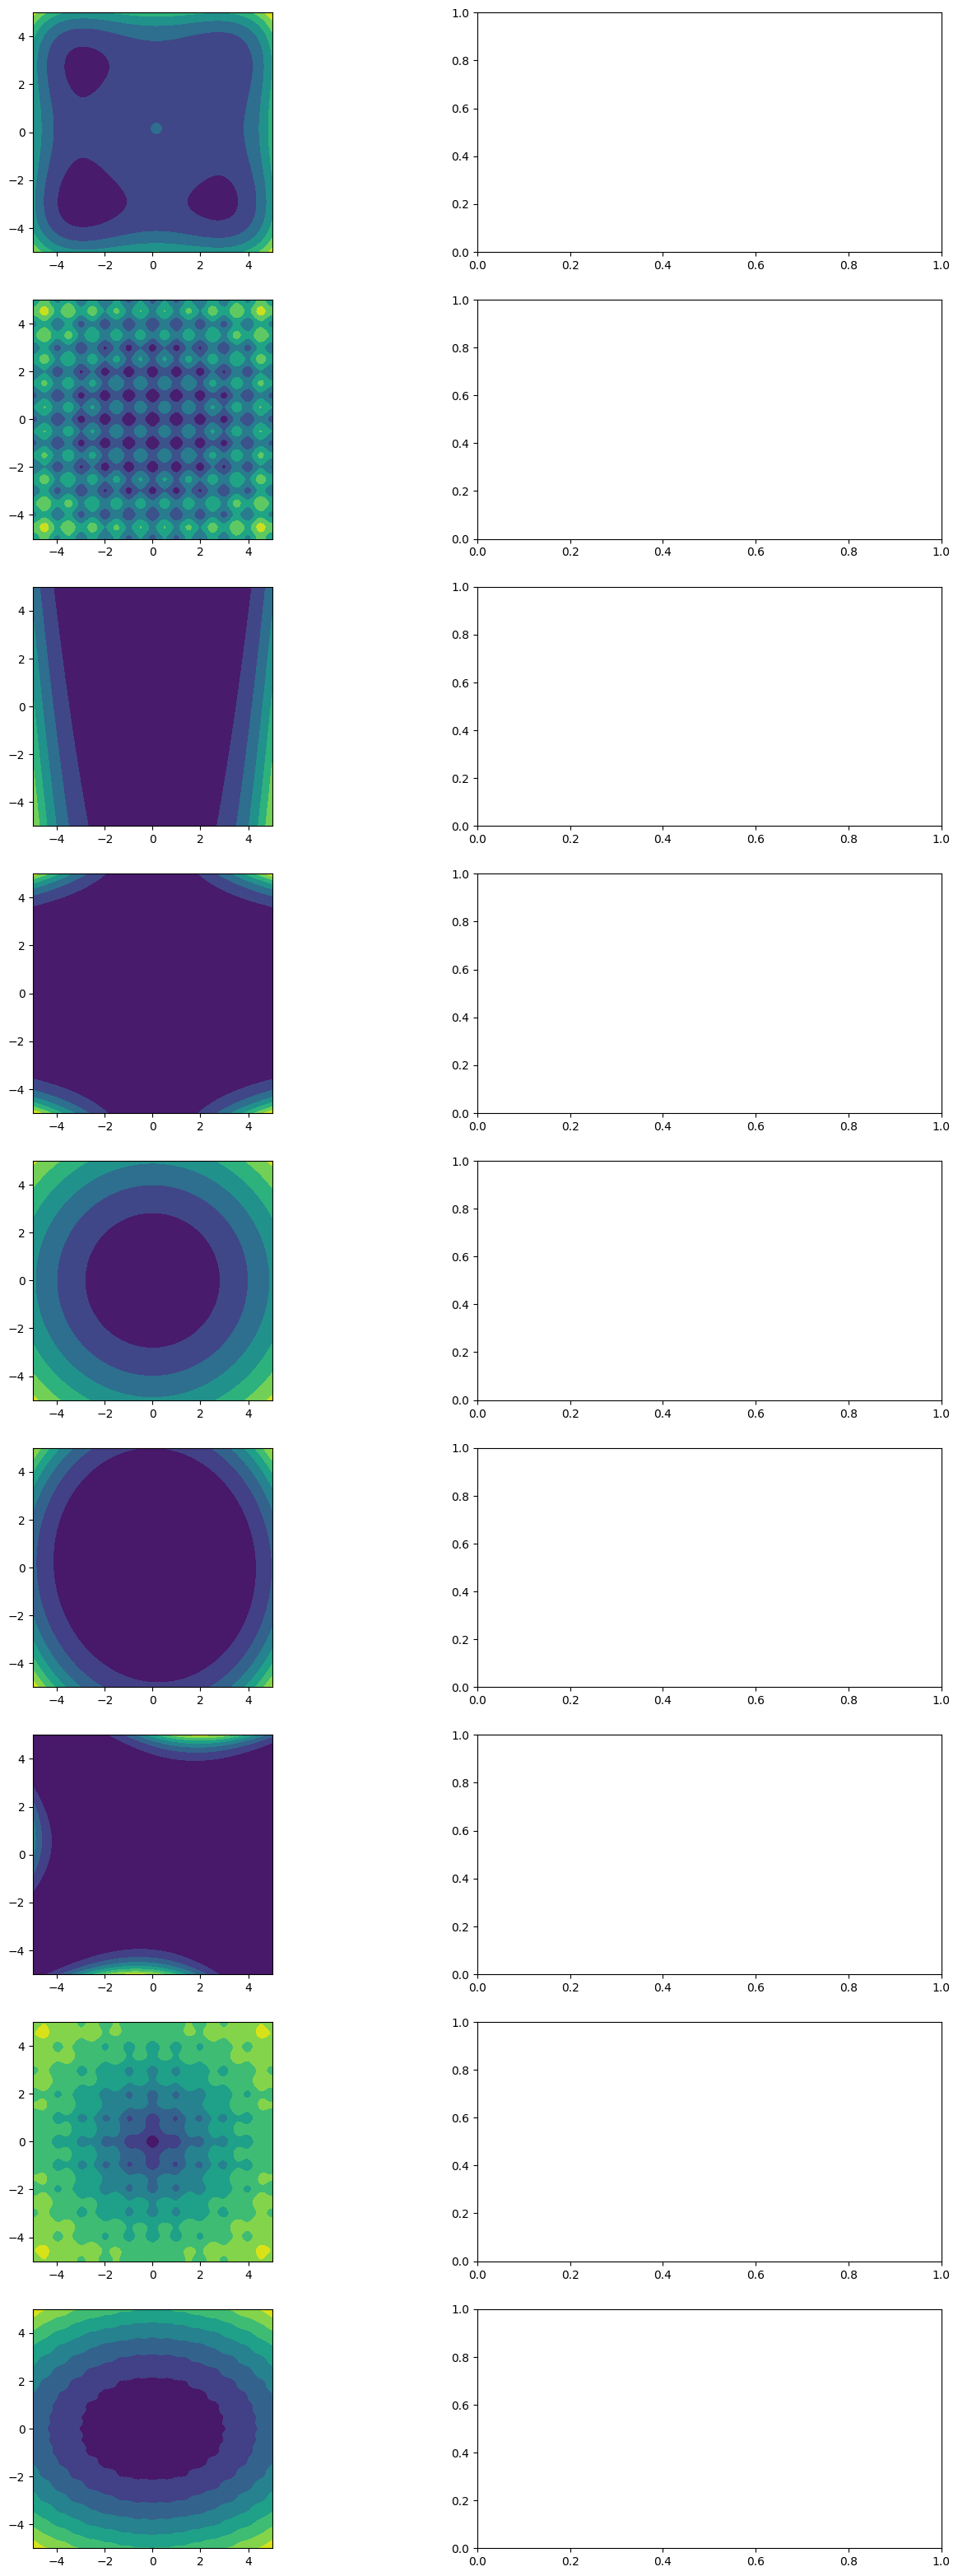

In [2]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).T

fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101).T

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')    

plt.show()

### Bayesian Optimization performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.017697663099020818     |0.0012680623186632567    |
|2    |Rastrigin           |250       |-0.003454106378772605    |0.0027245913306809108    |
|3    |Rosenbrock          |250       |0.0006183267204635648    |0.0008267027384167346    |
|4    |Beale               |250       |0.0013207026735200334    |0.0007511231796989893    |
|5    |Sphere              |250       |0.0016028592960066852    |0.0010238672522310908    |
|6    |Perm                |250       |0.002809501724690532     |0.0008635345072828571    |
|7    |GoldsteinPrice      |250       |-0.0001592016477259107   |0.0007429353703669301    |
|8    |Ackley              |250       |-0.002692844885727902    |0.006262591355916552     |
|9    |Bohachevsky         |250       |9.430107513067985e-05    |0.000991284570824287 

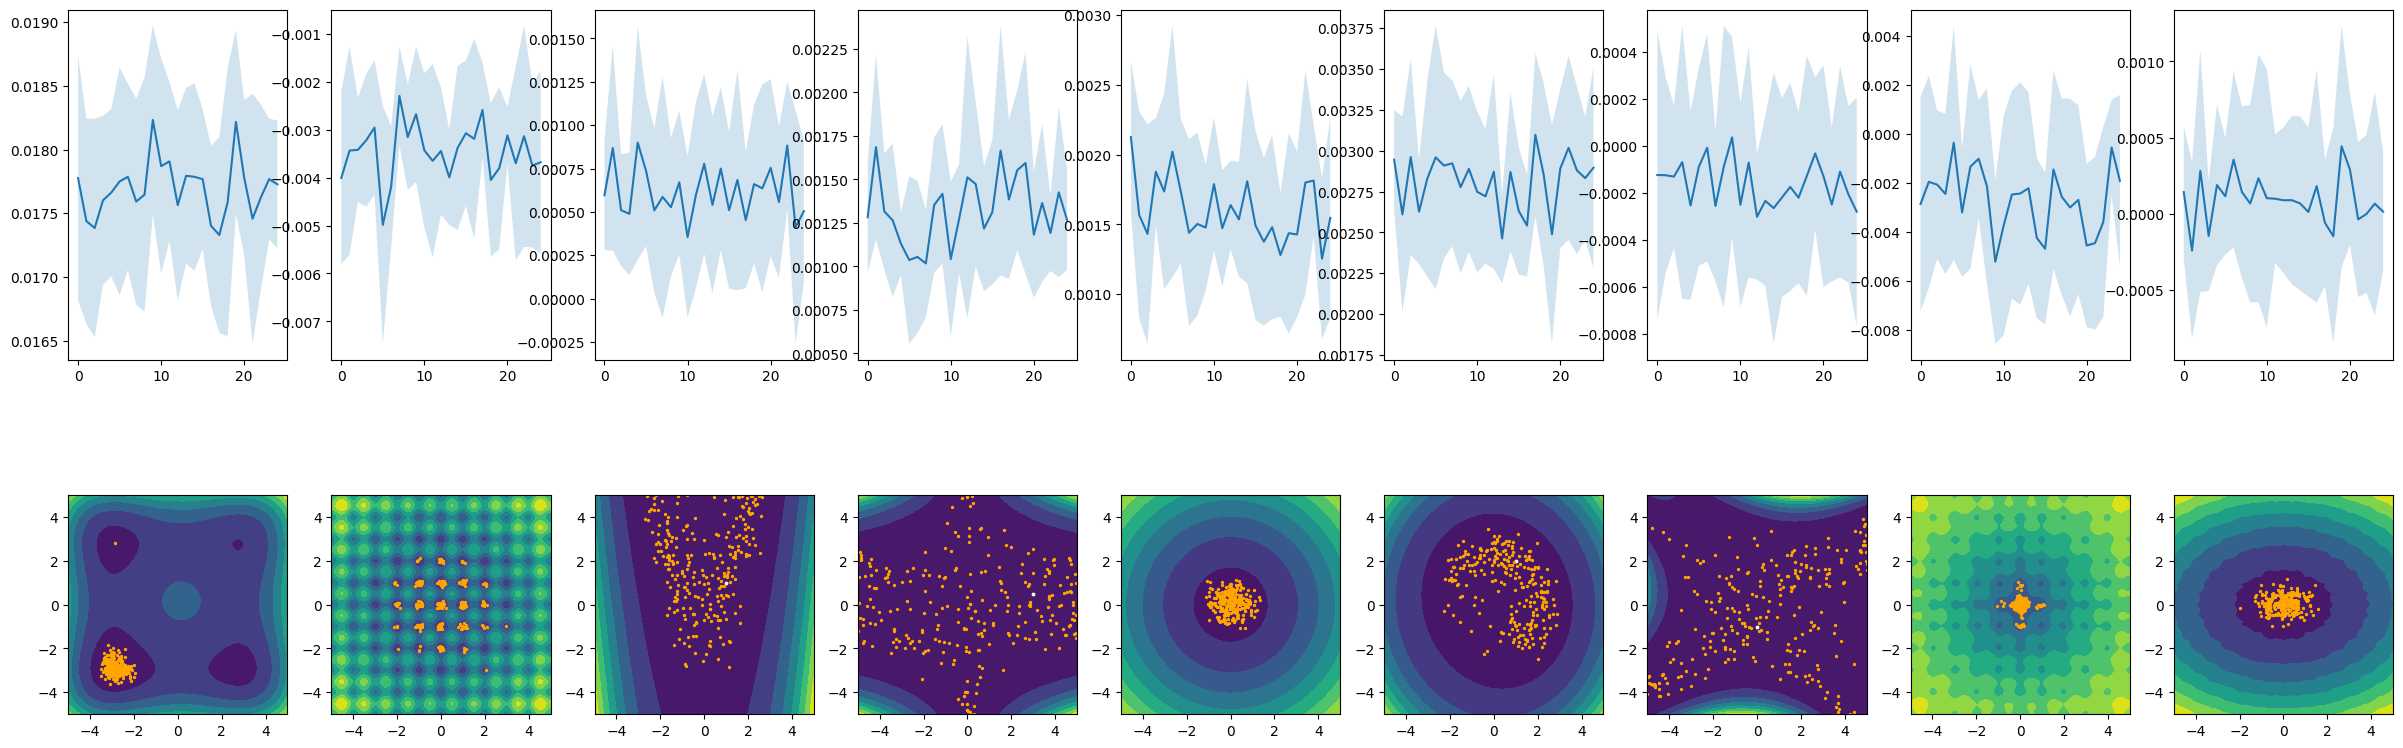

In [3]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = bayesian_optimization(test_function_scaled, X=initial_x, dimension=dimension, n_samples=n_samples, sampling_budget=budget, low=-5, high=5)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")

graphs1 = fig



### Latin Hypercube performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.019030526795947286     |0.002500162664372467     |
|2    |Rastrigin           |250       |-0.004287385956329647    |0.0035678816475152686    |
|3    |Rosenbrock          |250       |-0.0010205378547388023   |0.0016957362977077547    |
|4    |Beale               |250       |0.0019742237222440916    |0.0015154754772325227    |
|5    |Sphere              |250       |-0.0010002715299927182   |0.001669839955548518     |
|6    |Perm                |250       |-0.0005530084918236379   |0.0016942561570956808    |
|7    |GoldsteinPrice      |250       |0.0026285912249864917    |0.0016475674054805779    |
|8    |Ackley              |250       |-0.010652166535144945    |0.00602523689080658      |
|9    |Bohachevsky         |250       |0.000748108331491603     |0.001832441511122655 

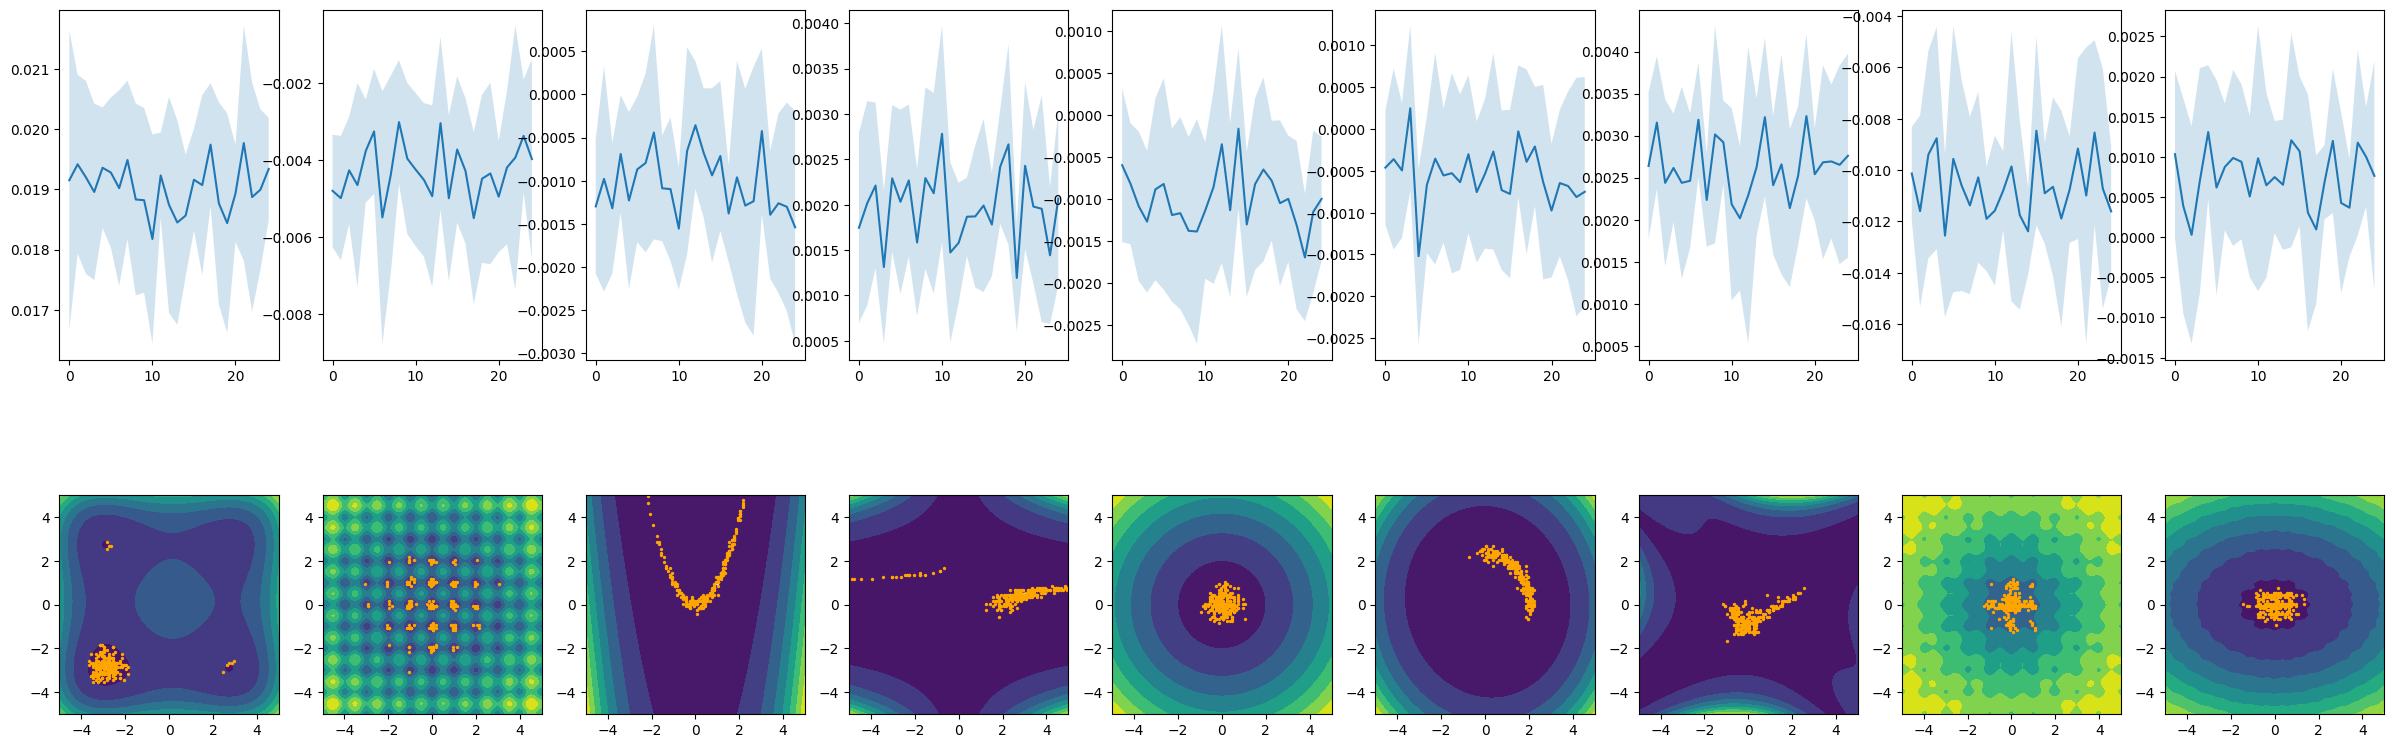

In [4]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = latin_hypercube(test_function_scaled, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")

graphs2 = fig


### Nelder Mead performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.012394328608813891     |0.006560193704198282     |
|2    |Rastrigin           |250       |-0.01378909516918631     |0.014074351510410128     |
|3    |Rosenbrock          |250       |0.0012347549547997451    |0.0070290158900020005    |
|4    |Beale               |250       |0.003215401651065079     |0.001855298645022848     |
|5    |Sphere              |250       |-0.004404481692498175    |0.015633424135211172     |
|6    |Perm                |250       |0.00011930576910713151   |0.0068430012168567665    |
|7    |GoldsteinPrice      |250       |0.00246139623930956      |0.0019169036526422909    |
|8    |Ackley              |250       |-0.028274723814724404    |0.023637169926983722     |
|9    |Bohachevsky         |250       |-0.006110241474424452    |0.01464180298986593  

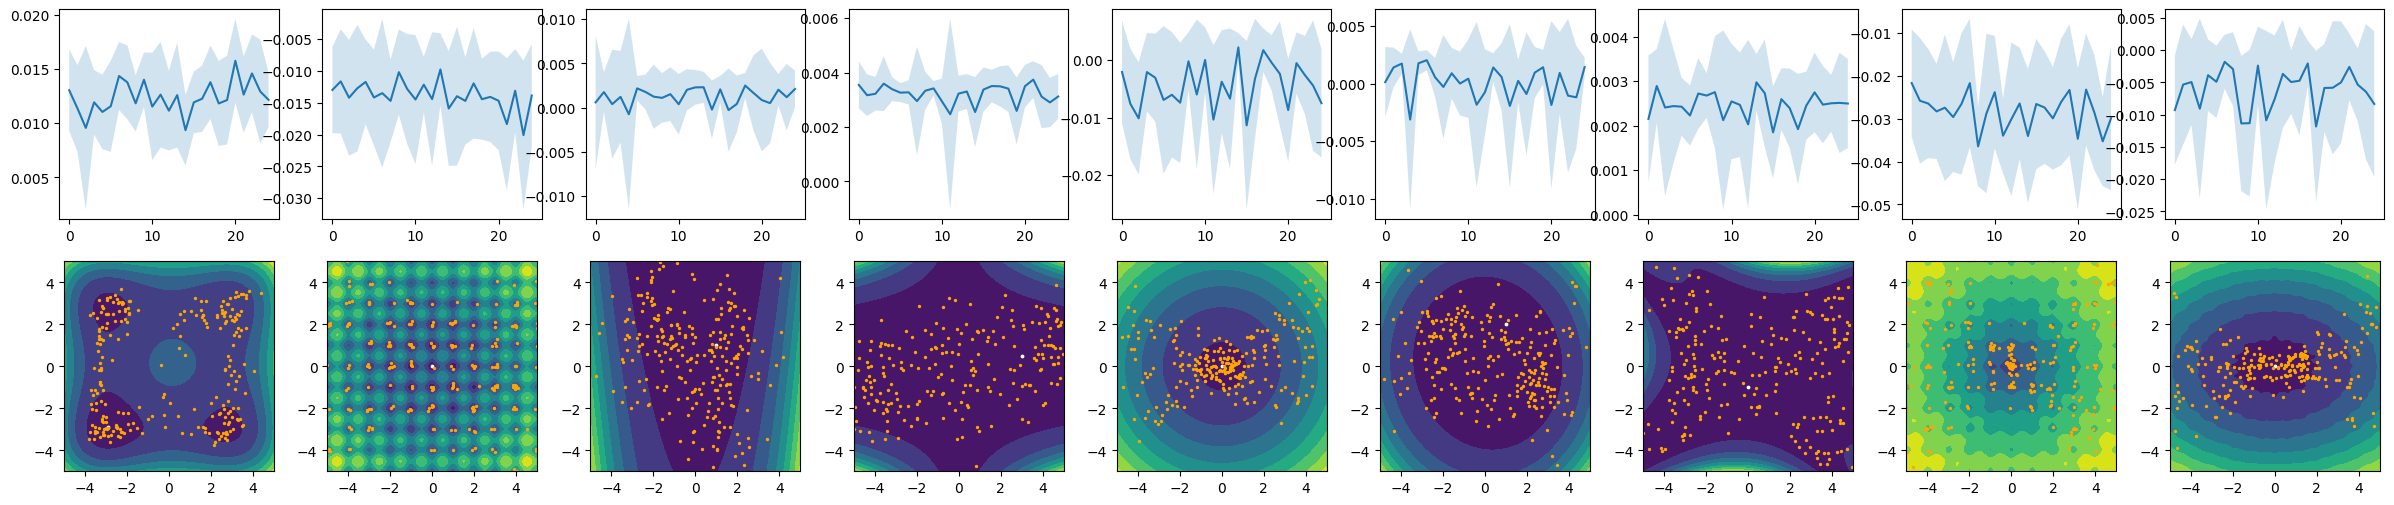

In [5]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,6))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = nelder_mead(test_function_scaled, x0 = initial_x[:,0], low=-5, high=5, step=0.1, no_improve_thr=10e-6, no_improv_break=10, sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")

graphs3  = fig

### Particle Swarm performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01754295145056611      |0.003031552631878353     |
|2    |Rastrigin           |250       |-0.003276804480665303    |0.003114563915114162     |
|3    |Rosenbrock          |250       |0.00017125086924755053   |0.001091694848440719     |
|4    |Beale               |250       |0.003056205434560612     |0.0009762950863921317    |
|5    |Sphere              |250       |-0.0011180027712623516   |0.001839871668539686     |
|6    |Perm                |250       |0.0028113955328480504    |0.0010486030000283267    |
|7    |GoldsteinPrice      |250       |0.0012819311801290942    |0.001057913846147246     |
|8    |Ackley              |250       |-0.012826691285719893    |0.008090896979699209     |
|9    |Bohachevsky         |250       |-0.0010462733009635522   |0.00178395509341914  

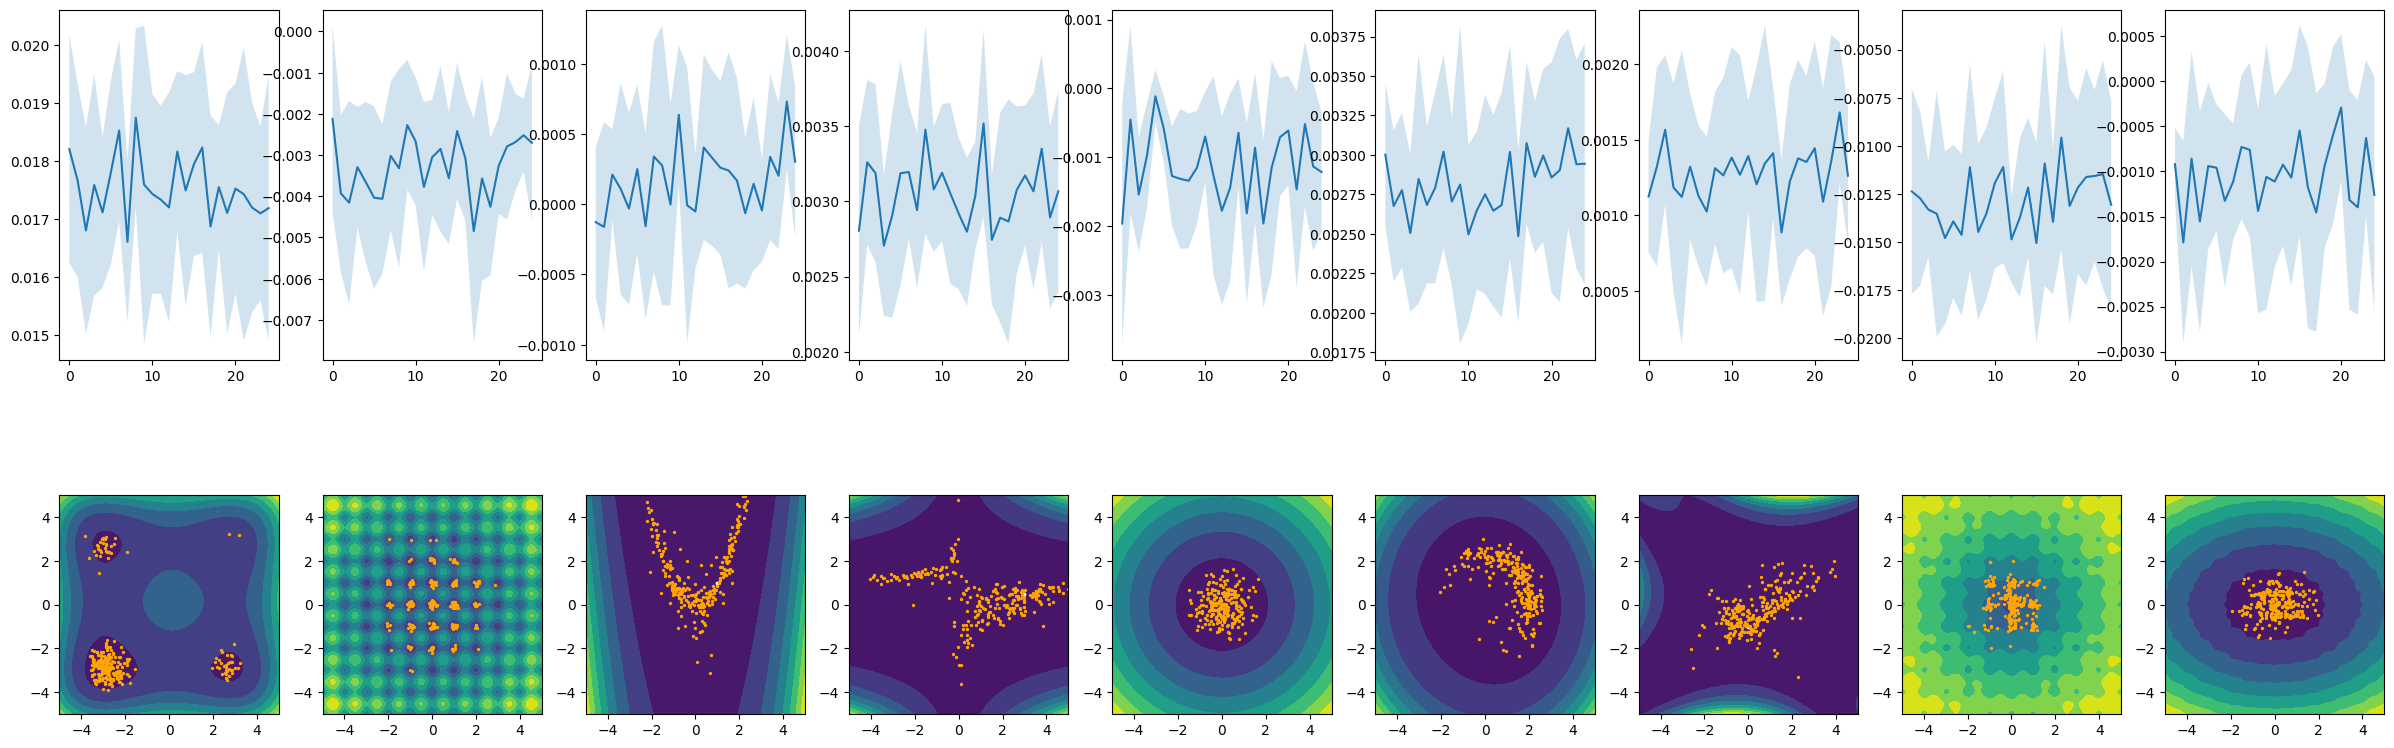

In [6]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = particle_swarm(test_function_scaled, X=initial_x, V=None, dimension=dimension, low=-5, high=5, sampling_budget=budget, n_particles=n_samples, tol=10e-6, c1=0.1, c2=0.1, w=0.8)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")


graphs4 = fig


### Sobol performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.018284010132413507     |0.0017199211284631042    |
|2    |Rastrigin           |250       |-0.0007905385411474723   |0.0014960456883433696    |
|3    |Rosenbrock          |250       |-0.0010918954722715555   |0.0014512076479122548    |
|4    |Beale               |250       |0.0010215661688357653    |0.0016384973993136317    |
|5    |Sphere              |250       |-1.250063810342539e-05   |0.0015453588569332717    |
|6    |Perm                |250       |7.684365096522604e-05    |0.0016003652188286768    |
|7    |GoldsteinPrice      |250       |-4.56017911536225e-05    |0.0016704587129063044    |
|8    |Ackley              |250       |0.0014695549964772845    |0.0015732988628453831    |
|9    |Bohachevsky         |250       |0.0003048001161096499    |0.0015973077187921144

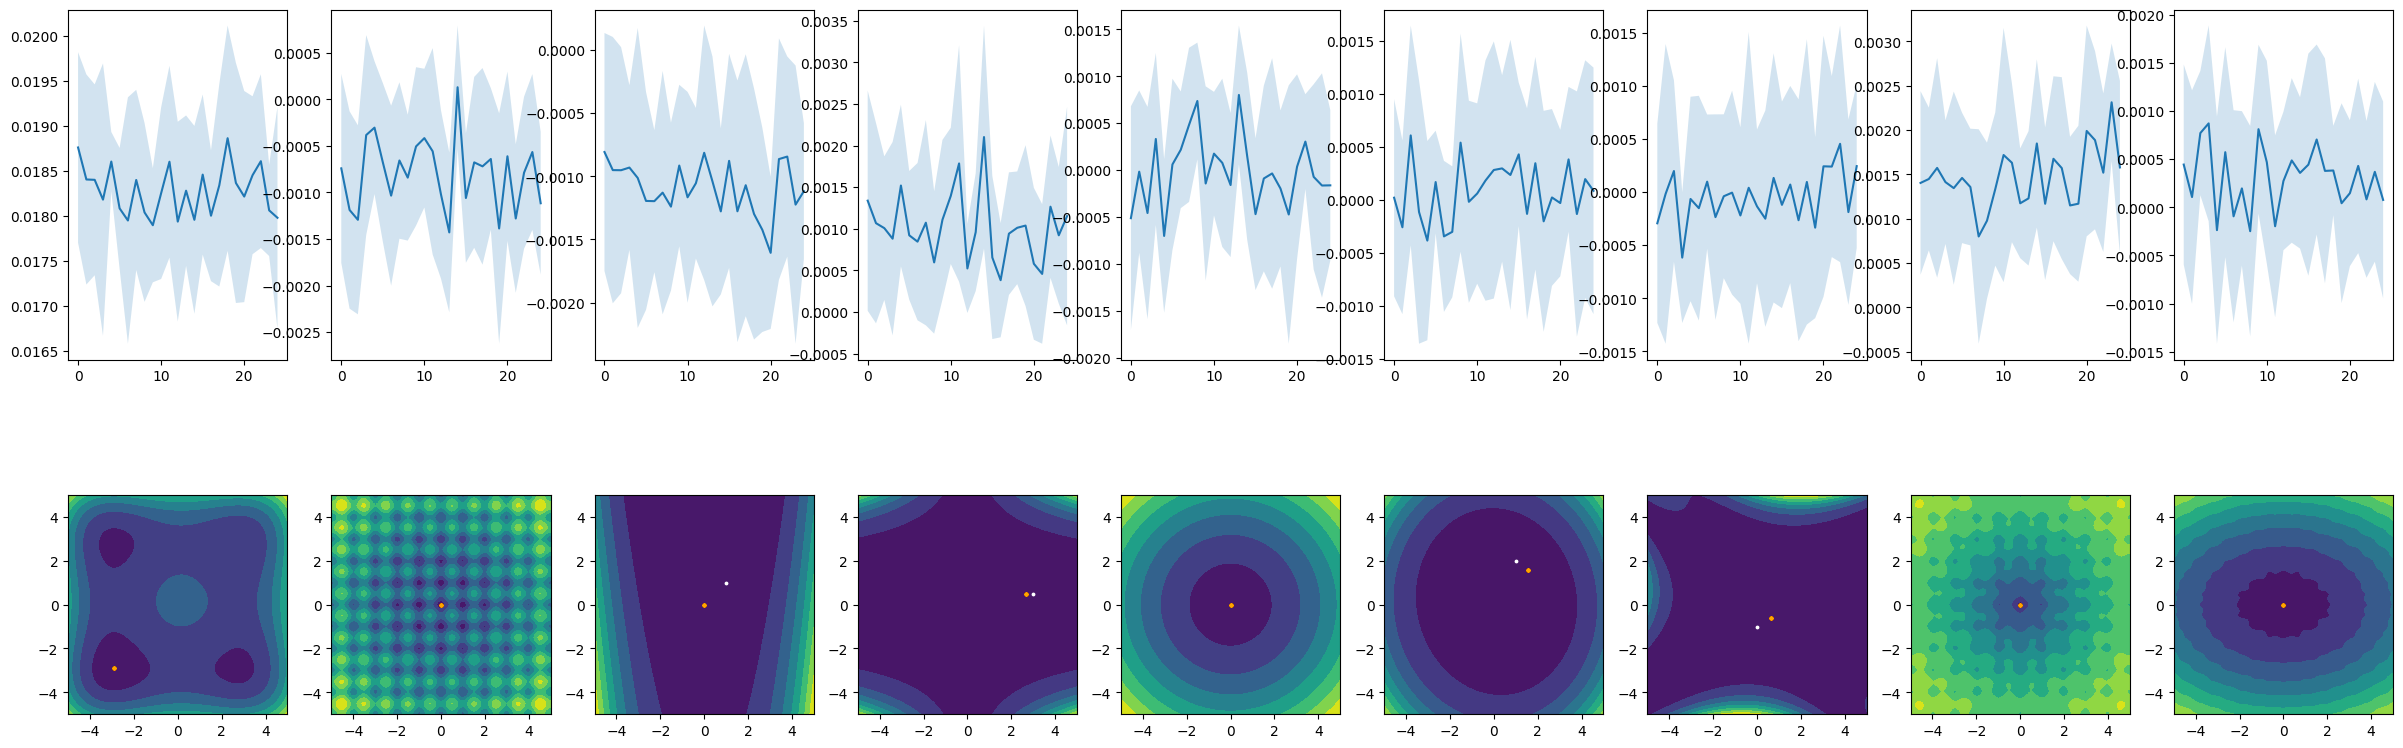

In [7]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = sobol(test_function_scaled,  n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")

graphs5 = fig


### Performance comparison